# Runtime metrics

Draw plots for the runtime metrics for the ResNet classification experiments

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

Load all csv files 

In [2]:
# Runs for the first three experiments:
runs_1 = [pd.read_csv('I/' + x)   for x in os.listdir('I')]
runs_2 = [pd.read_csv('II/' + x)  for x in os.listdir('II')]
runs_3 = [pd.read_csv('III/' + x) for x in os.listdir('III')]

# Runs for the fourth experiment (with and without dropout):
runs_4 = [pd.read_csv('IV/' + x) for x in os.listdir('IV') if 'dr_25' in x]
runs_4b = [pd.read_csv('IV/' + x) for x in os.listdir('IV') if 'dr_25' not in x]

Function that implements a *running average* to smoothen the plots.

In [3]:
def create_smooth(dataframe, window=10):

    variable = [dataframe.Value[0]]
    for i in range(2, window):
        variable.append(dataframe.Value.rolling(i).mean()[i-1])
    
    new_variable = np.r_[variable, list(dataframe.Value.rolling(window).mean()[window-1:])]
    
    dataframe['smooth'] = new_variable

Function that calculates the *error bands* used for some of the figures.

In [4]:
def create_bands(dataframe):
    
    steps = np.tile(dataframe.Step.values, 3)
    real_values = dataframe.Value.values
    smooth_values = dataframe.smooth.values
    mirrored_values = np.abs(2 * smooth_values - real_values)
    new_df = pd.DataFrame({'steps': steps,
                           'values': np.r_[real_values, smooth_values, mirrored_values]})
    return new_df

## I. Baseline

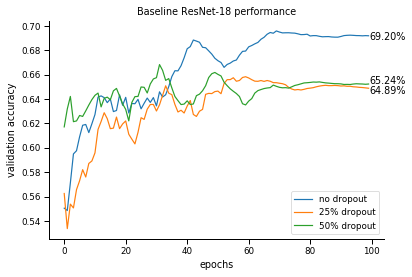

In [5]:
for run in runs_1:
    create_smooth(run)

sns.set_context('paper')
sns.lineplot(x='Step', y='smooth', data=runs_1[0], label='no dropout')
sns.lineplot(x='Step', y='smooth', data=runs_1[3], label='25% dropout')
sns.lineplot(x='Step', y='smooth', data=runs_1[1], label='50% dropout')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('Baseline ResNet-18 performance')

ax.text(runs_1[0].Step.values[-1]+0.1, runs_1[0].smooth.values[-1]-0.003,
        '{:.2f}%'.format(100*runs_1[0].smooth.values[-1]))
ax.text(runs_1[3].Step.values[-1]+0.1, runs_1[3].smooth.values[-1]-0.005,
        '{:.2f}%'.format(100*runs_1[3].smooth.values[-1]))
ax.text(runs_1[1].Step.values[-1]+0.1, runs_1[1].smooth.values[-1],
        '{:.2f}%'.format(100*runs_1[1].smooth.values[-1]))

baseline = runs_1[0].smooth.values[-1]

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/baseline.png', bbox_inches='tight')

## II. Traditional augmentation

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


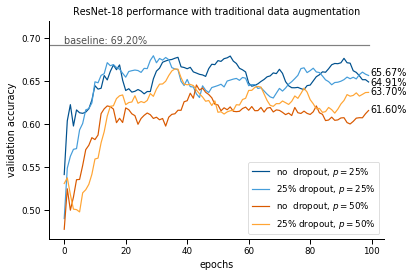

In [6]:
for run in runs_2:
    create_smooth(run)

current_palette = sns.color_palette()
sns.set_context('paper')

dark_blue = [min(1, max(0, x - 0.15)) for x in current_palette[0]]
light_blue = [min(1, max(0, x + 0.15)) for x in current_palette[0]]
dark_orange = [min(1, max(0, x - 0.15)) for x in current_palette[1]]
light_orange = [min(1, max(0, x + 0.15)) for x in current_palette[1]]

sns.lineplot(x='Step', y='smooth', data=runs_2[1], label='no  dropout, $p=25\%$', c=dark_blue)
sns.lineplot(x='Step', y='smooth', data=runs_2[3], label='25% dropout, $p=25\%$', c=light_blue)
sns.lineplot(x='Step', y='smooth', data=runs_2[4], label='no  dropout, $p=50\%$', c=dark_orange)
sns.lineplot(x='Step', y='smooth', data=runs_2[0], label='25% dropout, $p=50\%$', c=light_orange)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('ResNet-18 performance with traditional data augmentation')

ax.text(runs_2[1].Step.values[-1] + 0.5, runs_2[1].smooth.values[-1] - 0.004,
        '{:.2f}%'.format(100 * runs_2[1].smooth.values[-1]))
ax.text(runs_2[3].Step.values[-1] + 0.5, runs_2[3].smooth.values[-1],
        '{:.2f}%'.format(100 * runs_2[3].smooth.values[-1]))
ax.text(runs_2[4].Step.values[-1] + 0.5, runs_2[4].smooth.values[-1] - 0.003,
        '{:.2f}%'.format(100 * runs_2[4].smooth.values[-1]))
ax.text(runs_2[0].Step.values[-1] + 0.5, runs_2[0].smooth.values[-1] - 0.003,
        '{:.2f}%'.format(100 * runs_2[0].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(0, baseline + 0.001, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')

ax.set_xlim(xlim)
ax.set_ylim([ax.get_ylim()[0], 0.72])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/augment.png', bbox_inches='tight')

## III. GAN augmentation

### 0% dropout

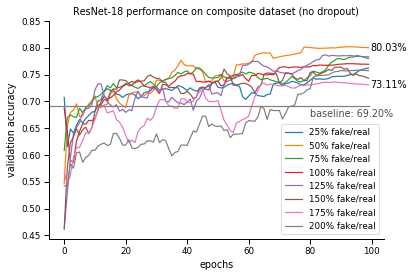

In [7]:
for run in runs_3:
    create_smooth(run)

sns.set_context('paper')

cmap = matplotlib.cm.get_cmap('PiYG')
colors = [cmap(x) for x in (0.82, 0.73, 0.64, 0.55, 0.46, 0.37, 0.28, 0.19)]
order = [2, 5, 13, 11, 3, 6, 0, 15]
labels = ['{}% fake/real'.format(x) for x in range(25, 201, 25)]

for i in range(8):
    sns.lineplot(x='Step', y='smooth', data=runs_3[order[i]],  label=labels[i])#, c=colors[i])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('ResNet-18 performance on composite dataset (no dropout)')

ax.text(runs_3[5].Step.values[-1] + 0.5, runs_3[5].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_3[5].smooth.values[-1]))

ax.text(runs_3[0].Step.values[-1] + 0.5, runs_3[0].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_3[0].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(80, baseline - 0.02, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')

ax.set_xlim(xlim)
ax.set_ylim([ax.get_ylim()[0], 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/gan_noaug_0dr.png', bbox_inches='tight')

### 25% dropout

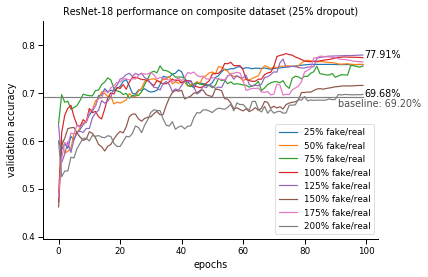

In [8]:
sns.set_context('paper')

cmap = matplotlib.cm.get_cmap('PiYG')
colors = [cmap(x) for x in (0.82, 0.73, 0.64, 0.55, 0.46, 0.37, 0.28, 0.19)]
order = [4, 9, 10, 7, 12, 8, 14, 1]
labels = ['{}% fake/real'.format(x) for x in range(25, 201, 25)]

for i in range(8):
    sns.lineplot(x='Step', y='smooth', data=runs_3[order[i]],  label=labels[i])#, c=colors[i])


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('ResNet-18 performance on composite dataset (25% dropout)')



ax.text(runs_3[5].Step.values[-1] + 0.5, runs_3[12].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_3[12].smooth.values[-1]))

ax.text(runs_3[0].Step.values[-1] + 0.5, runs_3[1].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_3[1].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(91, baseline - 0.02, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')
#ax.text(runs_2[1].Step.values[-1] + 0.5, baseline - 0.004, 
#        '{:.2f}%'.format(100 * baseline), color='0.3')

ax.set_xlim(xlim)
ax.set_ylim([ax.get_ylim()[0]-0.05, 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/gan_noaug_25dr.png', bbox_inches='tight')

### comparing 0% - 25% dropout

In [9]:
gan_no_aug_dr0 = []
order = [2, 5, 13, 11, 3, 6, 0, 15]
for i in range(8):
    gan_no_aug_dr0.extend(list(runs_3[order[i]].smooth))

gan_no_aug_dr25 = []
order = [4, 9, 10, 7, 12, 8, 14, 1]
for i in range(8):
    gan_no_aug_dr25.extend(list(runs_3[order[i]].smooth))
    
steps = np.tile(runs_3[0].Step.values, 8)

new_df = pd.DataFrame({'steps': steps,
                       'gan_no_aug_dr0': gan_no_aug_dr0, 
                       'gan_no_aug_dr25': gan_no_aug_dr25})

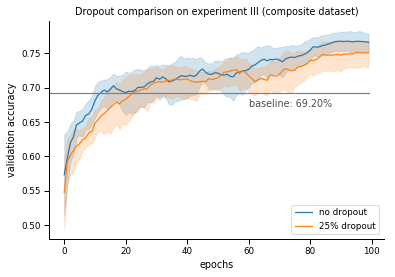

In [10]:
sns.lineplot(x='steps', y='gan_no_aug_dr0', data=new_df,  label='no dropout')
sns.lineplot(x='steps', y='gan_no_aug_dr25', data=new_df,  label='25% dropout')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('Dropout comparison on experiment III (composite dataset)')



#ax.text(100.5, , '{:.2f}%'.format(100 * runs_3[12].smooth.values[-1]))

#ax.text(100.5, 0.74,'{:.2f}%'.format(100 * runs_3[1].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(60, baseline - 0.02, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')
#ax.text(runs_2[1].Step.values[-1] + 0.5, baseline - 0.004, 
#        '{:.2f}%'.format(100 * baseline), color='0.3')

ax.set_xlim(xlim)
#ax.set_ylim([ax.get_ylim()[0]-0.05, 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/gan_noaug.png', bbox_inches='tight')

## IV. Both types of augmentation

### 0% dropout

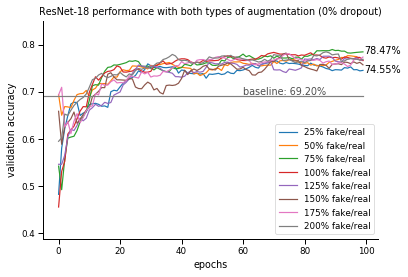

In [11]:
for run in runs_4b:
    create_smooth(run)

sns.set_context('paper')

cmap = matplotlib.cm.get_cmap('PiYG')
colors = [cmap(x) for x in (0.82, 0.73, 0.64, 0.55, 0.46, 0.37, 0.28, 0.19)]
order = [3, 5, 2, 1, 0, 6, 7, 4]
labels = ['{}% fake/real'.format(x) for x in range(25, 201, 25)]

for i in range(8):
    sns.lineplot(x='Step', y='smooth', data=runs_4b[order[i]],  label=labels[i])#, c=colors[i])


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('ResNet-18 performance with both types of augmentation (0% dropout)')

ax.text(runs_4b[2].Step.values[-1] + 0.5, runs_4b[2].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_4b[2].smooth.values[-1]))

ax.text(runs_4b[3].Step.values[-1] + 0.5, runs_4b[3].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_4b[3].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(60, baseline + 0.002, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')

ax.set_xlim(xlim)
ax.set_ylim([ax.get_ylim()[0]-0.05, 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/gan_aug_0dr.png', bbox_inches='tight')

### 25% dropout

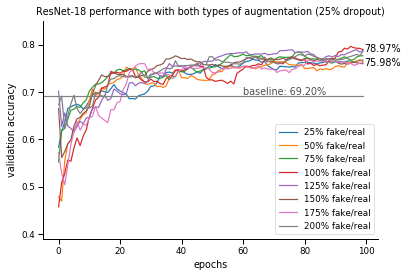

In [12]:
for run in runs_4:
    create_smooth(run)
    
sns.set_context('paper')

cmap = matplotlib.cm.get_cmap('PiYG')
colors = [cmap(x) for x in (0.82, 0.73, 0.64, 0.55, 0.46, 0.37, 0.28, 0.19)]
order = [4, 2, 7, 3, 0, 1, 6, 5]
labels = ['{}% fake/real'.format(x) for x in range(25, 201, 25)]

for i in range(8):
    sns.lineplot(x='Step', y='smooth', data=runs_4[order[i]],  label=labels[i])#, c=colors[i])


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('ResNet-18 performance with both types of augmentation (25% dropout)')

ax.text(runs_4[3].Step.values[-1] + 0.5, runs_4[3].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_4[3].smooth.values[-1]))

ax.text(runs_4[5].Step.values[-1] + 0.5, runs_4[1].smooth.values[-1] - 0.005,
        '{:.2f}%'.format(100 * runs_4[1].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(60, baseline + 0.002, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')
#ax.text(runs_2[1].Step.values[-1] + 0.5, baseline - 0.004, 
#        '{:.2f}%'.format(100 * baseline), color='0.3')

ax.set_xlim(xlim)
ax.set_ylim([ax.get_ylim()[0]-0.05, 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/gan_aug_25dr.png', bbox_inches='tight')

### comparing 0% - 25% dropout

In [13]:
gan_aug_dr25 = []
order = [4, 2, 7, 3, 0, 1, 6, 5]
for i in range(8):
    gan_aug_dr25.extend(list(runs_4[order[i]].smooth))
    
gan_aug_dr0 = []
order = [3, 5, 2, 1, 0, 6, 7, 4]
for i in range(8):
    gan_aug_dr0.extend(list(runs_4b[order[i]].smooth))
    
new_df['gan_aug_dr25'] = gan_aug_dr25
new_df['gan_aug_dr0'] = gan_aug_dr0

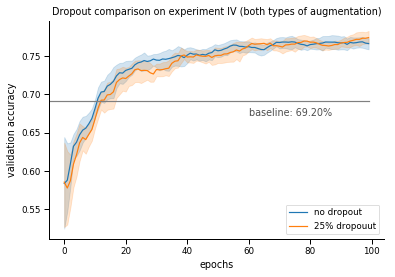

In [14]:
sns.lineplot(x='steps', y='gan_aug_dr0', data=new_df,  label='no dropout')
sns.lineplot(x='steps', y='gan_aug_dr25', data=new_df,  label='25% dropouut')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('Dropout comparison on experiment IV (both types of augmentation)')

#ax.text(100.5, , '{:.2f}%'.format(100 * runs_3[12].smooth.values[-1]))

#ax.text(100.5, 0.74,'{:.2f}%'.format(100 * runs_3[1].smooth.values[-1]))

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(60, baseline - 0.02, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')
#ax.text(runs_2[1].Step.values[-1] + 0.5, baseline - 0.004, 
#        '{:.2f}%'.format(100 * baseline), color='0.3')

ax.set_xlim(xlim)
#ax.set_ylim([ax.get_ylim()[0]-0.05, 0.85])

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/drop_comparison_4.png', bbox_inches='tight')

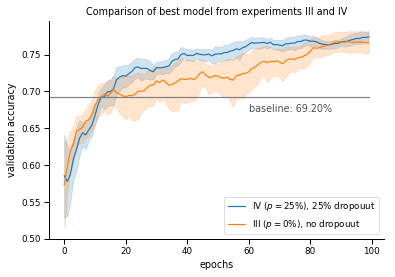

In [15]:
sns.lineplot(x='steps', y='gan_aug_dr25', data=new_df,  label='IV ($p=25\%$), 25% dropouut')
sns.lineplot(x='steps', y='gan_no_aug_dr0', data=new_df,  label='III ($p=0\%$), no dropouut')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right')
ax.set_title('Comparison of best model from experiments III and IV')

xlim = ax.get_xlim()
ax.plot([-10, 99], [baseline, baseline], c='0.5')
ax.text(60, baseline - 0.02, 'baseline: {:.2f}%'.format(100 * baseline), color='0.3', label='baseline')

ax.set_xlim(xlim)

ax.set_xlabel('epochs')
ax.set_ylabel('validation accuracy')

plt.savefig('figures/best_iii_iv.png', bbox_inches='tight')